In [1]:
from fastai.vision.all import *
PadMode='zeros'

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
path = '/content/drive/MyDrive/Projects/Plumbers_with_Vehicles/Images'
model_name = 'PwV_Classifier'

In [33]:
batch_size = 20
img_size = 200,200

In [34]:
extra_tfms = []

In [35]:
#Transforms
method = ResizeMethod.Pad
item_tfms = [Resize(img_size, method = method, pad_mode = 'zeros')]
batch_tfms = [Normalize.from_stats(*imagenet_stats),
            *aug_transforms(size=img_size, flip_vert=False,max_rotate=0,max_lighting=0.1,
                            max_warp=0, max_zoom=1.05, min_zoom=0.95,
                           xtra_tfms=extra_tfms)]

In [36]:
data = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2,splitter=RandomSplitter(seed=42),
                                    bs=batch_size,
                                    item_tfms=item_tfms,
                                    batch_tfms=batch_tfms
                                   )

In [37]:
data.vocab

['NoVehicle', 'Vehicle']

In [38]:
type(data.dataset[0][1])

fastai.torch_core.TensorCategory

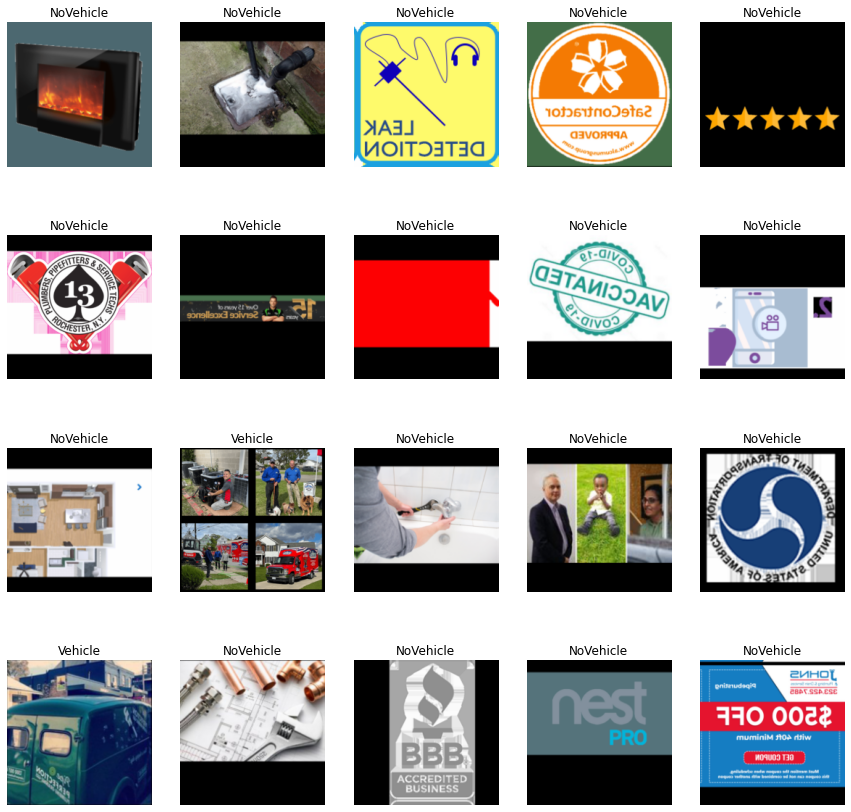

In [39]:
# show some data
data.show_batch(max_n = 20, figsize = (15,15))

In [26]:
np.savetxt(path+"/classes.csv", np.array(data.vocab), fmt='%s')
data.vocab

['NoVehicle', 'Vehicle']

In [40]:
learn = vision_learner(data, resnet18, metrics=error_rate).to_fp16()

In [41]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [42]:
# learn.fine_tune?

epoch,train_loss,valid_loss,error_rate,time
0,0.733087,0.242537,0.105751,00:22
1,0.307471,0.085137,0.018553,00:13


Better model found at epoch 0 with error_rate value: 0.1057513877749443.


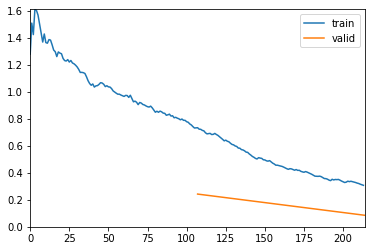

Better model found at epoch 1 with error_rate value: 0.01855287328362465.


epoch,train_loss,valid_loss,error_rate,time
0,0.134845,0.053797,0.016698,00:14
1,0.111464,0.056021,0.025974,00:14
2,0.080442,0.066432,0.018553,00:13
3,0.090726,0.080676,0.025974,00:14
4,0.078635,0.128061,0.029685,00:14
5,0.072744,0.135425,0.035250,00:14
6,0.073587,0.104780,0.022263,00:14
7,0.091986,0.141569,0.031540,00:14
8,0.043174,0.124191,0.022263,00:14
9,0.038291,0.099429,0.022263,00:14


Better model found at epoch 0 with error_rate value: 0.016697587445378304.


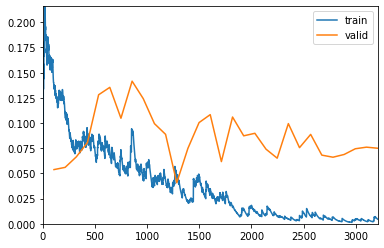

Better model found at epoch 11 with error_rate value: 0.009276439435780048.


In [43]:
learn.fine_tune(30,freeze_epochs=2,cbs = [ShowGraphCallback(),
                         SaveModelCallback(monitor='error_rate',with_opt=True, fname=model_name)])

In [44]:
# reload the best model
learn.load(model_name)
learn = learn.to_fp32()
learn.export('models/'+model_name+'.pkl')

In [45]:
interp = Interpretation.from_learner(learn)

In [46]:
interp = Interpretation.from_learner(learn)
loss = interp.losses.mean()

In [47]:
'models/'+model_name+'.pkl'

'models/PwV_Classifier.pkl'

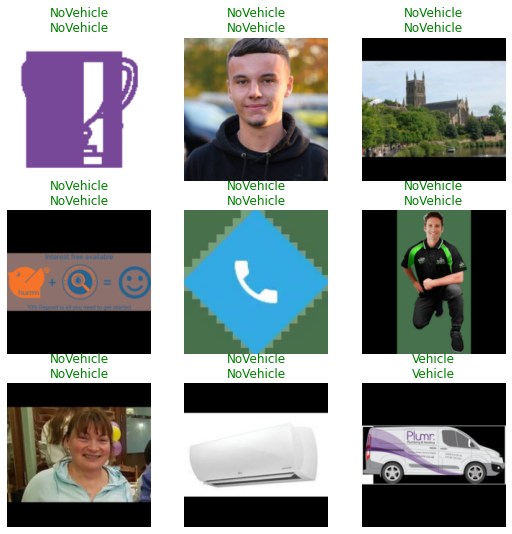

In [48]:
learn.show_results()

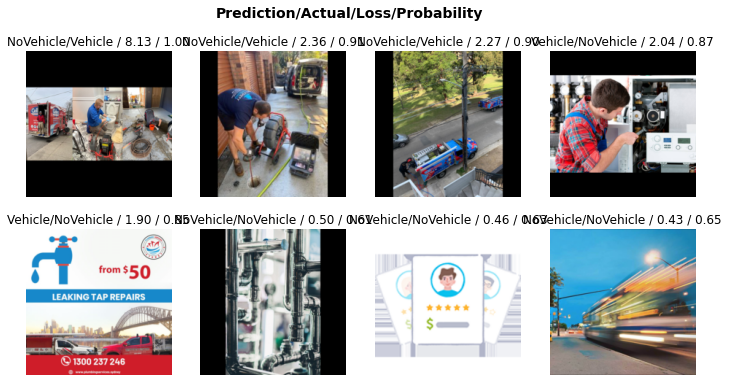

In [49]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(8)

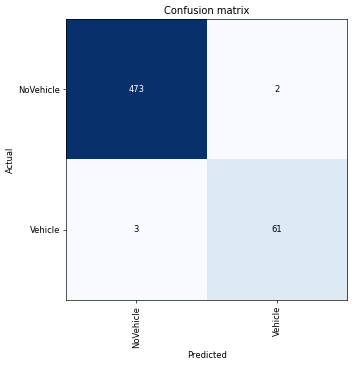

In [50]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)